In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

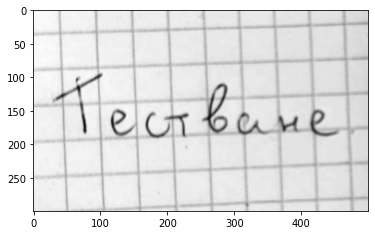

In [2]:
#this is bulgarian text meaning testing
img = cv2.imread("img/test_cube.jpg", cv2.IMREAD_GRAYSCALE)
img = img[200:500:,50:550:]  #python slicing 
plt.imshow(img, "gray")

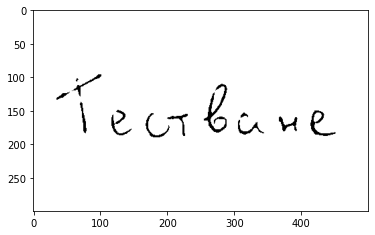

In [3]:
#with the right treshold the binarization can remove the cubes and you can work with only the text
# keep in mind that this will work only if the ink or the characters are darker that the backrgond aka the cube notebook
bin = np.copy(img)
t = 128
bin[bin>t] = 255
bin[bin<=t] = 0
plt.imshow(bin, "gray")

In [4]:
# woking with the background


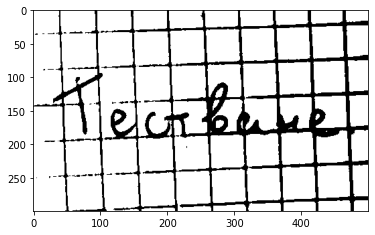

In [5]:
#this picture was taken with a phone and it is not good as you can see the shadows are off
#but this is a more real life example
bin = np.copy(img)
t = 165
bin[bin>t] = 255
bin[bin<=t] = 0
plt.imshow(bin, "gray")

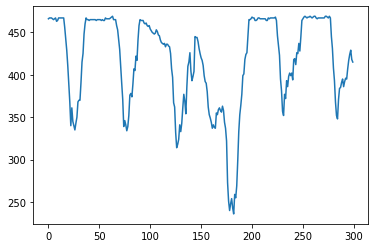

In [6]:
horizontal_hist = np.sum(bin,axis=1,keepdims=True)/255
plt.plot(horizontal_hist)

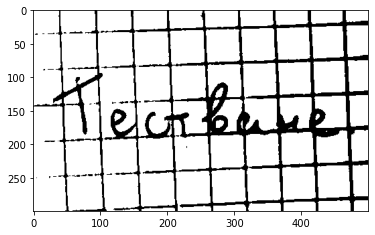

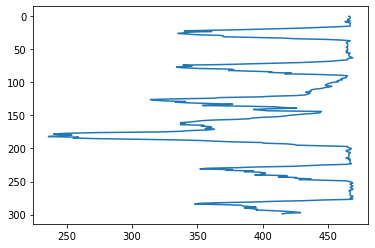

In [7]:
plt.imshow(bin,"gray")

_, ax = plt.subplots()
plt.plot(horizontal_hist,range(np.shape(horizontal_hist)[0]))
ax.invert_yaxis()
plt.show()

In [8]:
line_segments = list()
start = False
i1, i2 = 0, 0
for i in range(np.shape(bin)[0]):
    if horizontal_hist[i][0] < max(horizontal_hist)-10:
            if start == False:
                i1, start = i , True
    else:
        if start:
            i2, start = i,  False
            line_segments.append([i1,i2])

print(line_segments)


[[16, 36], [67, 90], [97, 197], [225, 249]]


In [9]:
cut_parts = list()
r, c = np.shape(line_segments)
for i in range(r):
    cut_parts.append(bin[line_segments[i][0]:line_segments[i][1]:])

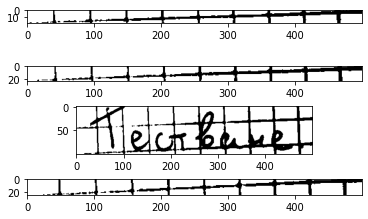

In [10]:
fig, axes = plt.subplots(nrows = r)
for i in range(r):
    axes[i].imshow(cut_parts[i], "gray")

In [11]:
# we can see from here that in most cases the background just adds unwanted noise to fix this we have to play with the tresholds of the clean up

In [12]:
print(line_segments)
for line in line_segments:
    print(line[1]-line[0])
#from here we can see that the lines have a low value to be text in most cases.
#using average
avg = 0
for line in line_segments:
    avg+=line[1]-line[0]
avg = avg/len(line_segments)
print(avg)

clean_lines = list()
for line in line_segments:
    if line[1]-line[0]<avg:
        clean_lines.append(line)

for line in clean_lines:
    line_segments.remove(line)
        
print(line_segments)

[[16, 36], [67, 90], [97, 197], [225, 249]]
20
23
100
24
41.75
[[97, 197]]


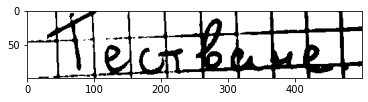

In [13]:
plt.imshow(bin[line_segments[0][0]:line_segments[0][1]:],"gray")

(1, 500)


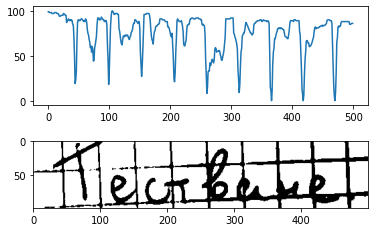

In [14]:
bin = bin[line_segments[0][0]:line_segments[0][1]:]
vertical_hist = np.sum(bin,axis=0,keepdims=True)/255
print(np.shape(vertical_hist))
v= list()
for i in range(np.shape(vertical_hist)[1]):
    v.append(vertical_hist[0][i])
    
plt.subplot(211)
plt.plot(v)
plt.subplot(212)
plt.imshow(bin, "gray")

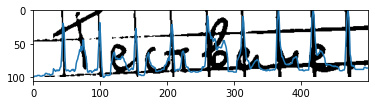

In [15]:
plt.imshow(bin,"gray")
plt.plot(v)

In [16]:
print(max(v))

100.0


In [17]:
print(min(v))

0.0


In [18]:
char_segments = list()
start = False
i1, i2 = 0, 0
m = min(v)
print(m)

for i in range(np.shape(bin)[1]):
    if vertical_hist[0][i] <= m+30:
            if start == False:
                i1, start = i , True
    else:
        if start:
            i2, start = i,  False
            char_segments.append([i1,i2])


print(char_segments)
new_segments = list()

if char_segments[0][0]>0:
    new_segments.append([0,char_segments[0][0]])


for i in range(len(char_segments)-1):
    new_segments.append([char_segments[i][1],char_segments[i+1][0]])

if char_segments[len(char_segments)-1][1]<np.shape(bin)[1]:
    new_segments.append([char_segments[len(char_segments)-1][1],np.shape(bin)[1]])

print(new_segments)


0.0
[[44, 46], [99, 100], [153, 154], [206, 208], [259, 262], [312, 315], [364, 368], [416, 421], [468, 472]]
[[0, 44], [46, 99], [100, 153], [154, 206], [208, 259], [262, 312], [315, 364], [368, 416], [421, 468], [472, 500]]


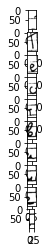

In [19]:
numbers = list()

#using python slicing
for c in new_segments:
    numbers.append(bin[::,c[0]:c[1]:])

fig, axes = plt.subplots(nrows = len(numbers))
for i in range(len(numbers)):
    axes[i].imshow(numbers[i], "gray")